In [33]:
import sys
sys.path.append("../..")

from ToolKit.ML import plot_decision_boundary2F2D
from ToolKit.ML import plot_soft_margin_svc2F2D

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.datasets import load_iris
from sklearn.svm import SVC


In [34]:
iris_dataset = load_iris()

X, y = iris_dataset['data'], iris_dataset['target']

X_df = pd.DataFrame(X, columns = iris_dataset['feature_names'])
y_df = pd.DataFrame(y, columns = ['Type'])

iris_df = X_df.join(y_df)

#########

X_selected_df = X_df[['petal width (cm)', 'sepal width (cm)']]

iris_selected_df = X_selected_df.join(y_df)

iris_selected_df

,petal width (cm),sepal width (cm),Type
0,0.2,3.5,0
1,0.2,3.0,0
2,0.2,3.2,0
3,0.2,3.1,0
4,0.2,3.6,0
...,...,...,...
145,2.3,3.0,2
146,1.9,2.5,2
147,2.0,3.0,2
148,2.3,3.4,2


In [35]:
# 将所有类别0变成类别2
iris_selected_df['Type'] = iris_selected_df['Type'].apply(lambda x : 2 if x == 0 else x)

# 将所有类别1的‘petal width’减少0.3
iris_selected_df['petal width (cm)'] = iris_selected_df.apply(lambda row : row['petal width (cm)'] - 0.4 if row['Type'] == 1 else row['petal width (cm)'], axis = 1)

temp_df = iris_selected_df

iris_selected_df = temp_df[['sepal width (cm)']].join(temp_df[['petal width (cm)']])
iris_selected_df = iris_selected_df.join(temp_df[['Type']])

iris_selected_df

,sepal width (cm),petal width (cm),Type
0,3.5,0.2,2
1,3.0,0.2,2
2,3.2,0.2,2
3,3.1,0.2,2
4,3.6,0.2,2
...,...,...,...
145,3.0,2.3,2
146,2.5,1.9,2
147,3.0,2.0,2
148,3.4,2.3,2


<AxesSubplot:xlabel='sepal width (cm)', ylabel='petal width (cm)'>

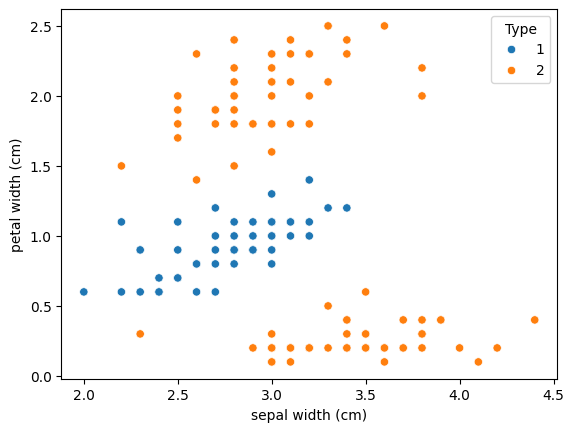

In [36]:
sns.scatterplot(iris_selected_df, x = 'sepal width (cm)', y = 'petal width (cm)', hue = 'Type',
                palette = 'tab10', markers = 'species')

In [37]:
X = iris_selected_df.drop(['Type'], axis = 1)
y = iris_selected_df[['Type']]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 13)

In [38]:
# SVM使用线性核函数 = SVC
svm_clf = SVC(kernel = 'linear', C = 1)

svm_clf.fit(X_train, y_train)

# 查看精度
print('SVC accuracy is: {}'.format(svm_clf.score(X_test, y_test)))

SVC accuracy is: 0.7333333333333333


c:\Users\MagicBoy Zhang\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\utils\validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


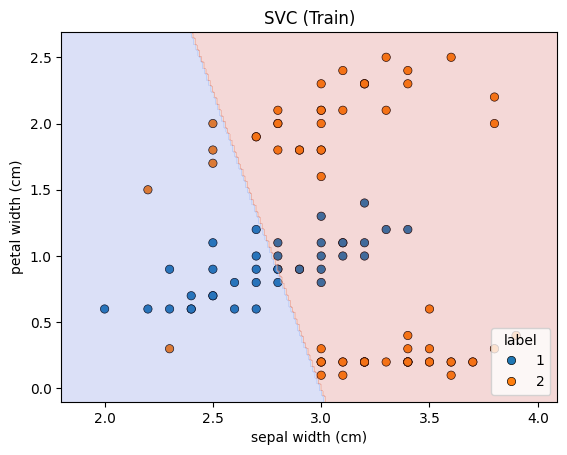

In [39]:
plot_decision_boundary2F2D(X_train, X_test, y_train, y_test, svm_clf, 'train', 'SVC (Train)')

Decision Function Distances(sorted) for all samples:


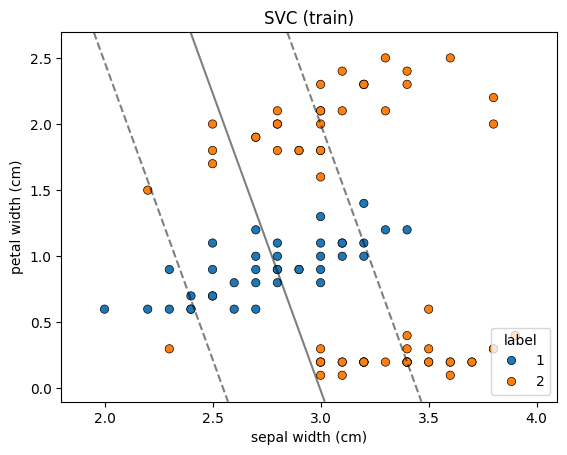

array([-1.92917743, -1.48235397, -1.40788387, -1.25894224, -1.11000061,
       -1.03553051, -1.03553051, -1.03552907, -0.9858833 , -0.76247157,
       -0.76247157, -0.66317715, -0.58870705, -0.56388272, -0.48941263,
       -0.36529532, -0.26600089, -0.26599946, -0.21635368, -0.21635225,
       -0.16670647, -0.11705783, -0.06741205, -0.04258916,  0.00705805,
        0.00705805,  0.05670382,  0.05670526,  0.10635103,  0.10635103,
        0.10635103,  0.10635247,  0.15599825,  0.23046978,  0.23046978,
        0.28011556,  0.28011842,  0.28011842,  0.32976277,  0.32976277,
        0.4042343 ,  0.45388151,  0.45388294,  0.50352872,  0.5531745 ,
        0.5531745 ,  0.5531745 ,  0.5531745 ,  0.5531745 ,  0.55317593,
        0.55317736,  0.55317736,  0.60282458,  0.65247035,  0.67729467,
        0.67729467,  0.72694045,  0.77658623,  0.77658766,  0.77658766,
        0.80141198,  0.90070641,  0.90070641,  0.95035218,  0.99999796,
        0.99999796,  0.99999796,  0.99999796,  0.99999796,  0.99

In [40]:
plot_soft_margin_svc2F2D(X_train, X_test, y_train, y_test, svm_clf, 'train', 'SVC (train)')

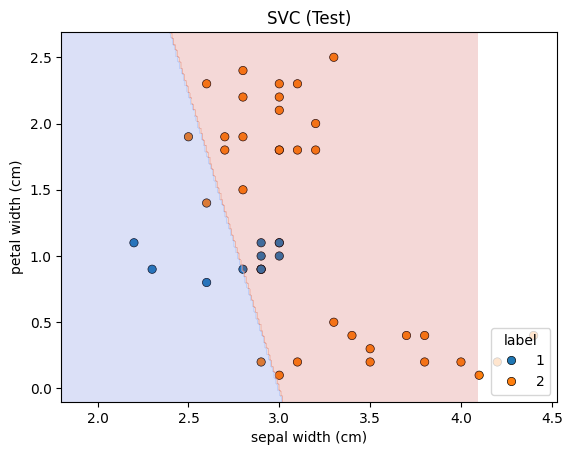

In [41]:
plot_decision_boundary2F2D(X_train, X_test, y_train, y_test, svm_clf, 'test', 'SVC (Test)')

### 径向核函数 radial kernel 二分类

In [42]:
# SVM使用非线性核函数
svm_clf = SVC(kernel = 'rbf', C = 1, gamma = 'scale')

svm_clf.fit(X_train, y_train)

# 查看精度
print('SVM accuracy is: {}'.format(svm_clf.score(X_test, y_test)))

SVM accuracy is: 0.9555555555555556


c:\Users\MagicBoy Zhang\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\utils\validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


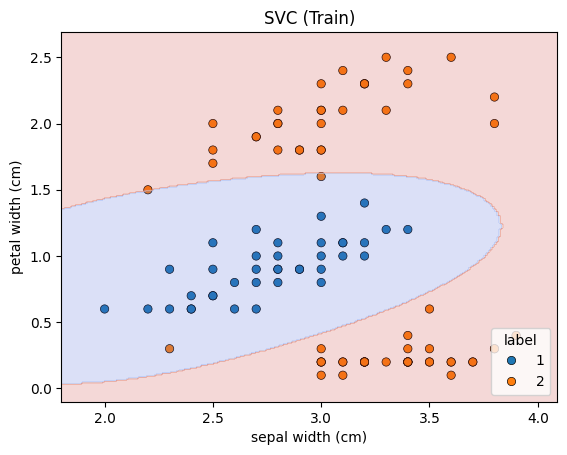

In [43]:
plot_decision_boundary2F2D(X_train, X_test, y_train, y_test, svm_clf, 'train', 'SVC (Train)')

Decision Function Distances(sorted) for all samples:


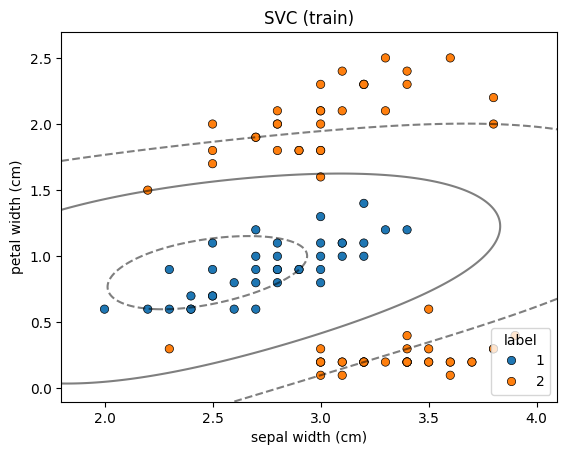

array([-1.16983491, -1.13632236, -1.12379044, -1.12004521, -1.11825006,
       -1.09453928, -1.0810641 , -1.07184295, -1.07169197, -1.07169197,
       -1.0714839 , -1.0714839 , -1.0449995 , -1.03251477, -1.0043302 ,
       -1.00070646, -1.00070646, -0.9998913 , -0.99613999, -0.98238735,
       -0.98238735, -0.95228897, -0.93560615, -0.93411686, -0.92663672,
       -0.91268983, -0.88453329, -0.86287066, -0.85973629, -0.85973629,
       -0.81647741, -0.80576065, -0.77012075, -0.75871528, -0.72939094,
       -0.63737223, -0.53627568, -0.4797021 , -0.45601486, -0.06609605,
        0.01630228,  0.29632244,  0.35202957,  0.43809329,  0.53132379,
        0.53132379,  0.56686834,  0.56686834,  0.61023824,  0.67237237,
        0.67237237,  0.67237237,  0.68974235,  0.77641695,  0.83575365,
        0.83575365,  0.99896438,  0.99974374,  0.99974374,  0.99974374,
        0.99974374,  0.99974374,  0.99974378,  0.99974378,  1.00040372,
        1.00113318,  1.15396712,  1.16140185,  1.16574387,  1.17

In [44]:
plot_soft_margin_svc2F2D(X_train, X_test, y_train, y_test, svm_clf, 'train', 'SVC (train)')

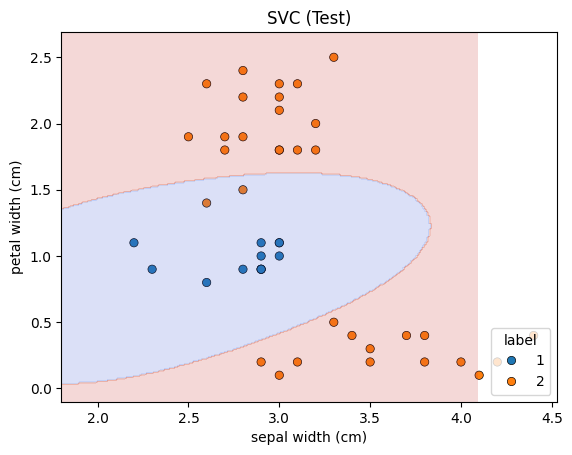

In [45]:
plot_decision_boundary2F2D(X_train, X_test, y_train, y_test, svm_clf, 'test', 'SVC (Test)')